In [3]:
import pandas as pd
import numpy as np
import copy
import matplotlib.pyplot as plt
import pickle

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, StratifiedShuffleSplit
from sklearn.metrics import f1_score, accuracy_score, confusion_matrix, ConfusionMatrixDisplay

ModuleNotFoundError: No module named 'kiwisolver'

In [2]:
speclib_filepath = "../Output/D_002_SpecLib_Derivs.csv"

input_df = pd.read_csv(speclib_filepath)
input_df.head()

,ScanID,Area,Code_name,Species_name,Functional_group1,Functional_group2,Species_name_Freq,Functional_group1_Freq,Functional_group2_Freq,Boochs,...,852.593_5nm,857.593_5nm,862.593_5nm,867.593_5nm,872.593_5nm,877.593_5nm,882.593_5nm,887.593_5nm,892.593_5nm,897.593_5nm
0,aleoch_Murph_061,Murphy,aleoch,Alectoria ochroleuca,Lichen_Fruticose_Yellow,Lichen,6,97,460,0.001818,...,0.253714,0.254478,0.255176,0.255714,0.256204,0.256744,0.257286,0.257767,0.258160,0.258481
1,aleoch_Murph_063,Murphy,aleoch,Alectoria ochroleuca,Lichen_Fruticose_Yellow,Lichen,6,97,460,0.001779,...,0.201025,0.201714,0.202366,0.202943,0.203526,0.204171,0.204810,0.205368,0.205809,0.206160
2,aleoch_Murph_064,Murphy,aleoch,Alectoria ochroleuca,Lichen_Fruticose_Yellow,Lichen,6,97,460,0.002775,...,0.317765,0.318003,0.318183,0.318076,0.317934,0.317952,0.317931,0.317696,0.317323,0.316932
3,aleoch_Murph_065,Murphy,aleoch,Alectoria ochroleuca,Lichen_Fruticose_Yellow,Lichen,6,97,460,0.003004,...,0.337911,0.338070,0.338184,0.338127,0.338018,0.337977,0.338016,0.338104,0.338143,0.338103
4,aleoch_Murph_066,Murphy,aleoch,Alectoria ochroleuca,Lichen_Fruticose_Yellow,Lichen,6,97,460,0.002610,...,0.288182,0.288323,0.288394,0.288381,0.288399,0.288523,0.288659,0.288687,0.288507,0.288137


In [3]:
input_df.describe()



,Species_name_Freq,Functional_group1_Freq,Functional_group2_Freq,Boochs,Boochs2,CARI,Carter,Carter2,Carter3,Carter4,...,852.593_5nm,857.593_5nm,862.593_5nm,867.593_5nm,872.593_5nm,877.593_5nm,882.593_5nm,887.593_5nm,892.593_5nm,897.593_5nm
count,1242.000000,1242.000000,1242.00000,1242.000000,1242.000000,1242.000000,1242.000000,1242.000000,1242.000000,1242.000000,...,1242.000000,1242.000000,1242.000000,1242.000000,1242.000000,1242.000000,1242.000000,1242.000000,1242.000000,1242.000000
mean,64.107890,153.916264,360.23913,0.007230,0.006660,0.553402,2.709288,0.369544,0.317081,0.597069,...,0.468960,0.469817,0.470616,0.471332,0.472073,0.472896,0.473650,0.474222,0.474700,0.475164
std,180.662822,260.944965,264.26811,0.003885,0.004435,0.336229,1.462365,0.273165,0.253226,0.216878,...,0.155499,0.155478,0.155438,0.155357,0.155258,0.155152,0.154998,0.154776,0.154541,0.154331
min,1.000000,2.000000,29.00000,-0.001433,-0.000485,0.062027,0.946166,0.063634,0.045895,0.210464,...,0.056940,0.057816,0.058709,0.059630,0.060547,0.061441,0.062360,0.063342,0.064347,0.065349
25%,11.000000,43.000000,163.00000,0.004276,0.002005,0.343776,1.579709,0.141644,0.119955,0.412678,...,0.382868,0.382855,0.383045,0.383842,0.385063,0.386801,0.388162,0.389896,0.390974,0.391887
50%,18.000000,76.000000,336.00000,0.007746,0.007406,0.459818,2.177169,0.226106,0.189253,0.530701,...,0.480958,0.480932,0.480954,0.481799,0.482149,0.482658,0.482906,0.483511,0.483952,0.483693
75%,44.000000,136.000000,460.00000,0.009992,0.010396,0.663082,3.492733,0.628102,0.506195,0.812549,...,0.562106,0.562649,0.564173,0.564708,0.565524,0.566165,0.567182,0.567102,0.567791,0.568679
max,930.000000,992.000000,1016.00000,0.023572,0.017849,3.123549,10.069696,1.005836,1.033136,1.011443,...,0.939878,0.941816,0.943457,0.944686,0.945720,0.946704,0.947419,0.947747,0.948040,0.948558


In [15]:
training_df, test_df = train_test_split(input_df, test_size=0.15)

In [4]:
def is_numeric(input_obj):
    is_number = False
    if(isinstance(input_obj, float)):
        is_number = True
    if(isinstance(input_obj, int)):
        is_number = True
    
    return is_number
        

In [5]:
def add_noise_to_vec(vec, variance = 0.05):
    noisy_vec = copy.deepcopy(vec).flatten()
    
    for idx in range(vec.size):
        if is_numeric(noisy_vec[idx]):
            noisy_vec[idx] = noisy_vec[idx] + np.random.normal(loc=0.0, scale= variance)

    return noisy_vec

## Ask for noise file from Charlie at Headwall


In [6]:
unique_groups = input_df["Functional_group2"].unique()
print(unique_groups)

['Lichen' 'Shrub' 'Graminoid' 'Dwarf Shrub' 'Forb' 'Moss' 'Abiotic' 'Tree']


In [7]:
output_filename = "./trainingData.csv"

In [8]:
header = input_df.columns

In [9]:
def write_csv_line(file, arr):
    output_arr = arr.reshape((arr.size,))
    for idx in range(arr.size):
        if(idx == (arr.size - 1)):
            file.write(str(output_arr[idx]))
            file.write("\n")
        else:        
            file.write(str(output_arr[idx]))
            file.write(",")

In [12]:
def make_dataset_from_speclib(input_df, output_filename, unique_groups, num_per_class):
    with open(output_filename, "a+") as out_file:
        header_str = ",".join(input_df.columns)
        out_file.writelines([header_str])
        out_file.write("\n")
        for group in unique_groups:
            filtered_df = input_df[input_df["Functional_group2"] == group]
            for i in range(num_per_class):
                sample = filtered_df.sample(1, axis=0).to_numpy()
                noisy_sample = add_noise_to_vec(sample)
                write_csv_line(out_file, noisy_sample)


            
            
            
            

In [16]:
make_dataset_from_speclib(
    input_df = training_df,
    output_filename=output_filename,
    unique_groups=unique_groups,
    num_per_class=500)

In [17]:
test_data_filename = "./validation.csv"

make_dataset_from_speclib(
    input_df=test_df,
    output_filename=test_data_filename,
    unique_groups=unique_groups,
    num_per_class=100
)


In [18]:
training_data = pd.read_csv(output_filename)

C:\Python39\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [25]:
training_data.describe()


,Species_name_Freq,Functional_group1_Freq,Functional_group2_Freq,Boochs,Boochs2,CARI,Carter,Carter2,Carter3,Carter4,...,852.593_5nm,857.593_5nm,862.593_5nm,867.593_5nm,872.593_5nm,877.593_5nm,882.593_5nm,887.593_5nm,892.593_5nm,897.593_5nm
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,...,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,41.711019,142.775263,255.001294,0.007834,0.007353,0.558711,2.343916,0.387733,0.338802,0.617181,...,0.459040,0.457202,0.458957,0.461705,0.461414,0.461865,0.462210,0.460737,0.464458,0.462185
std,108.356249,291.951782,308.845587,0.050247,0.050741,0.303589,1.308030,0.290527,0.274345,0.212139,...,0.163124,0.163005,0.164712,0.163878,0.163110,0.161182,0.163247,0.161841,0.163524,0.162475
min,1.933747,1.975508,28.870883,-0.204380,-0.189977,-0.051214,0.888452,-0.029703,-0.060638,0.129363,...,-0.023950,-0.076657,-0.049284,-0.014452,-0.044748,-0.010296,-0.009357,-0.010087,-0.059288,-0.060454
25%,7.979403,17.041369,59.397666,-0.026059,-0.027159,0.365978,1.436126,0.162608,0.142360,0.444796,...,0.359099,0.353880,0.353305,0.358484,0.356374,0.360411,0.361712,0.356002,0.360398,0.362753
50%,13.023032,35.939283,95.017486,0.007119,0.006756,0.490765,1.823718,0.260457,0.229529,0.555096,...,0.469295,0.467010,0.469096,0.468521,0.467661,0.470137,0.472978,0.470376,0.474649,0.469887
75%,20.045276,79.994085,304.102520,0.040751,0.041393,0.666417,2.800551,0.619198,0.464254,0.801848,...,0.562298,0.559584,0.562769,0.567258,0.565570,0.563711,0.564377,0.564276,0.567814,0.563846
max,611.102636,967.144021,991.144156,0.179914,0.222947,2.961519,8.452715,1.143011,1.144257,1.165742,...,1.025979,1.003641,0.988504,1.074409,1.032489,0.997044,1.033283,0.946639,0.993616,0.961048


In [32]:
rf_base = RandomForestClassifier(
    n_estimators=1000,
    min_samples_split=2,
    bootstrap=True,
    verbose=1,
)# trained on original data

rf_augmented = RandomForestClassifier(
    n_estimators=1000,
    min_samples_split=2,
    bootstrap=True,
    verbose=1,
) # new data

In [34]:
training_df.columns

Index(['ScanID', 'Code_name', 'Species_name', 'Functional_group1',
       'Functional_group2', 'Area', 'Species_name_Freq',
       'Functional_group1_Freq', 'Functional_group2_Freq', 'Boochs',
       ...
       '852.593_5nm', '857.593_5nm', '862.593_5nm', '867.593_5nm',
       '872.593_5nm', '877.593_5nm', '882.593_5nm', '887.593_5nm',
       '892.593_5nm', '897.593_5nm'],
      dtype='object', length=205)

In [35]:
rf_base.fit(
    training_df.drop(
        columns=[
            "ScanID",
            "Code_name",
            "Species_name", 
            "Functional_group1", 
            "Functional_group2",
            "Area",
            'Functional_group1_Freq',
            'Functional_group2_Freq' ]), 
    training_df["Functional_group2"])

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    7.6s finished


RandomForestClassifier(n_estimators=1000, verbose=1)

In [38]:
dropped_cols = [
            "ScanID",
            "Code_name",
            "Species_name", 
            "Functional_group1", 
            "Functional_group2",
            "Area",
            'Functional_group1_Freq',
            'Functional_group2_Freq' ]

In [36]:
rf_augmented.fit(
    training_data.drop(
        columns=[
            "ScanID",
            "Code_name",
            
            "Species_name", 
            "Functional_group1", 
            "Functional_group2",
            "Area",
            'Functional_group1_Freq',
            'Functional_group2_Freq' ]), 
    training_data["Functional_group2"])

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:   38.2s finished


RandomForestClassifier(n_estimators=1000, verbose=1)

In [39]:
base_test_pred = rf_base.predict(test_df.drop(columns=dropped_cols))

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.1s finished


In [42]:
base_accuracy = accuracy_score(test_df["Functional_group2"], base_test_pred)
base_f1 = f1_score(test_df["Functional_group2"], base_test_pred, average = 'weighted')

In [44]:
augmented_test_pred = rf_augmented.predict(test_df.drop(columns=dropped_cols))
augmented_accuracy = accuracy_score(test_df["Functional_group2"], augmented_test_pred)
augmented_f1 = f1_score(test_df["Functional_group2"], augmented_test_pred, average = 'weighted')

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.1s finished


In [47]:
print("--- Test results comparison ---")
print("Base Model (Class Imbalance):")
print(f"Accuracy: \t{base_accuracy}")
print(f"F1 Score: \t{base_f1}")
print("Augmented Model (Added noise, No Class Imbalance):")
print(f"Accuracy: \t{augmented_accuracy}")
print(f"F1 Score: \t{augmented_f1}")

--- Test results comparison ---
Base Model (Class Imbalance):
Accuracy: 	0.906832298136646
F1 Score: 	0.9052834467120181
Augmented Model (Added noise, No Class Imbalance):
Accuracy: 	0.9316770186335404
F1 Score: 	0.934919697849447


In [ ]:
print("--- Test results comparison ---")
print("Base Model (Class Imbalance):")
print(f"Accuracy: \t{base_accuracy}")
print(f"F1 Score: \t{base_f1}")
print("Augmented Model (Added noise, No Class Imbalance):")
print(f"Accuracy: \t{augmented_accuracy}")
print(f"F1 Score: \t{augmented_f1}")

--- Test results comparison ---
Base Model (Class Imbalance):
Accuracy: 	0.906832298136646
F1 Score: 	0.9052834467120181
Augmented Model (Added noise, No Class Imbalance):
Accuracy: 	0.9316770186335404
F1 Score: 	0.934919697849447


## To Do
Smoothing of target data
Heterogenious 
Normalization or standardization
Optimization of number of classes; should be homogeneous

Rigorous statistical analysis to establish clusters
* Euclidean distance in spectral is problematic; must be on the same scale: Normalization to [0,1]? z-scores?
* Clustering
* More scan data is good
* Difference between spectra on ground and drone (DEMs to correct reflectance)
* Partial Least Squares Descriminant Analysis: non-orthogonal PCA; finds axes of variation (like factor analysis for classification)
* consider wide range of options

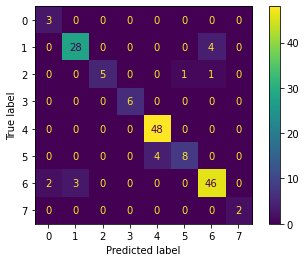

In [58]:
base_confusion = confusion_matrix(test_df["Functional_group2"], base_test_pred)
base_cm = ConfusionMatrixDisplay(base_confusion)

base_cm.plot()
plt.show()

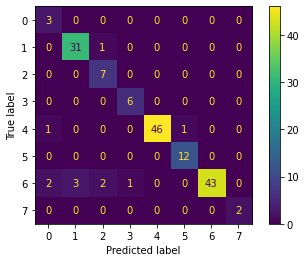

In [59]:
augmented_confusion = confusion_matrix(test_df["Functional_group2"], augmented_test_pred)
augmented_cm = ConfusionMatrixDisplay(augmented_confusion)

augmented_cm.plot()
plt.show()

In [63]:
base_filename = "./base_rf_1.pkl"
augmented_filename = "./class_corrected_noised_rf_1.pkl"

with open(base_filename, 'wb') as base_file:
    pickle.dump(rf_base, base_file)
    
with open(augmented_filename, 'wb') as aug_file:
    pickle.dump(rf_augmented, aug_file)

## Learnings

Trees perhaps should be split

water status makes a big difference, same with phenotype variation
Photograph on the ground, find exact spot on ground and 


## File transfers
cyberduck
fileZilla

use MD5 sums